<a href="https://colab.research.google.com/github/ThomasMoming/Week3-ClassicML/blob/test/Week_3_ML_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Library**

In [5]:
#importing the required libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os
# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')

**函数_特征提取//Feature_extraction**

In [55]:
def feature_chromagram(waveform, sample_rate):
    # STFT computed here explicitly; mel spectrogram and MFCC functions do this under the hood
    stft_spectrogram=np.abs(librosa.stft(waveform))
    # Produce the chromagram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
    print(f"Chromagram: {chromagram}")  # 调试打印
    return chromagram

def feature_melspectrogram(waveform, sample_rate):
    # Produce the mel spectrogram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # Using 8khz as upper frequency bound should be enough for most speech classification tasks
    melspectrogram=np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000).T,axis=0)
    print(f"Mel Spectrogram: {melspectrogram}")  # 调试打印
    return melspectrogram

def feature_mfcc(waveform, sample_rate):
    # Compute the MFCCs for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # 40 filterbanks = 40 coefficients
    mfc_coefficients=np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0)
    print(f"MFCC: {mfc_coefficients}")  # 调试打印
    return mfc_coefficients

**函数_导入返回函数//Get_Feature**

In [45]:
def get_features(file):
    # load an individual soundfile
     with soundfile.SoundFile(file) as audio:
        waveform = audio.read(dtype="float32")
        sample_rate = audio.samplerate
        # compute features of soundfile
        chromagram = feature_chromagram(waveform, sample_rate)
        melspectrogram = feature_melspectrogram(waveform, sample_rate)
        mfc_coefficients = feature_mfcc(waveform, sample_rate)

        feature_matrix=np.array([])

        # Check the shape of chromagram
        if chromagram.ndim > 1 and chromagram.shape[1] > 1:
            #print(f"Returning zero vector for chromagram size: {file} (shape: {chromagram.shape})")
            chromagram = np.zeros((12,))  # Return a zero vector of size (12,)

        # Check the shape of mel spectrogram
        if melspectrogram.ndim > 1 and melspectrogram.shape[1] > 1:
            #print(f"Returning zero vector for mel spectrogram size: {file} (shape: {melspectrogram.shape})")
            melspectrogram = np.zeros((128,))  # Return a zero vector of size (128,)

        # Check the shape of MFCC coefficients
        if mfc_coefficients.ndim > 1 and mfc_coefficients.shape[1] > 1:
            #print(f"Returning zero vector for MFCC size: {file} (shape: {mfc_coefficients.shape})")
            mfc_coefficients = np.zeros((40,))  # Return a zero vector of size (40,)

        # use np.hstack to stack our feature arrays horizontally to create a feature matrix
        feature_matrix = np.hstack((chromagram, melspectrogram, mfc_coefficients))

        return feature_matrix

**情绪设定//Emotion_Set**

In [6]:
#Emotions in the RAVDESS dataset
emotions_dict ={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

**文件读取和导入//Data_Load**

In [7]:
import os, glob

def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/Audio_Data/audio_speech_actors_01-24/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions_dict[file_name.split("-")[2]]
        features = get_features(file)
        X.append(features)
        y.append(emotion)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{1440} audio samples',end=' ')
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)

Test

In [57]:
path = "/content/drive/MyDrive/Audio_Data/my_voice_path/Actor_*/*.wav"
audio_files = glob.glob(path)
for file in audio_files:
    print(f"Audio file: {file}")

Audio file: /content/drive/MyDrive/Audio_Data/my_voice_path/Actor_25/03-01-07-01-02-01-25.wav
Audio file: /content/drive/MyDrive/Audio_Data/my_voice_path/Actor_25/03-01-08-01-02-01-25.wav
Audio file: /content/drive/MyDrive/Audio_Data/my_voice_path/Actor_25/03-01-04-01-02-01-25.wav
Audio file: /content/drive/MyDrive/Audio_Data/my_voice_path/Actor_25/03-01-02-01-02-01-25.wav
Audio file: /content/drive/MyDrive/Audio_Data/my_voice_path/Actor_25/03-01-05-01-02-01-25.wav
Audio file: /content/drive/MyDrive/Audio_Data/my_voice_path/Actor_25/03-01-03-01-02-01-25.wav
Audio file: /content/drive/MyDrive/Audio_Data/my_voice_path/Actor_25/03-01-06-01-02-01-25.wav
Audio file: /content/drive/MyDrive/Audio_Data/my_voice_path/Actor_25/03-01-01-01-02-01-25.wav


**个人文件读取//Personal_Data_Load**

In [58]:
# 加载自定义数据的函数
def load_custom_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/Audio_Data/my_voice_path/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions_dict[file_name.split("-")[2]]
        features = get_features(file)
        X.append(features)
        y.append(emotion)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{8} audio samples',end=' ')
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)



**--Personal_Set--**

In [59]:
custom_features,custom_emotions = load_custom_data()

Chromagram: [0.6293111  0.66144264 0.6160439  0.6232137  0.66640514 0.67966676
 0.66454244 0.6353752  0.62768424 0.63527924 0.61605895 0.6135408 ]
Mel Spectrogram: [1.83602199e-02 7.51037821e-02 1.11323535e-01 1.36526391e-01
 6.96352839e-01 4.24083853e+00 7.09697580e+00 8.16703129e+00
 3.08767295e+00 5.22704005e-01 1.12273061e+00 6.11168480e+00
 8.16944218e+00 8.49102879e+00 1.46121893e+01 5.39817390e+01
 8.53366241e+01 2.89477921e+01 2.15603237e+01 2.31001892e+01
 3.06022072e+01 2.10514240e+01 1.43422117e+01 1.35575294e+01
 1.05209055e+01 4.48457289e+00 1.68955946e+00 1.27167320e+00
 1.75462854e+00 3.47231388e+00 5.71231318e+00 4.10770559e+00
 1.36482334e+00 7.38919854e-01 9.83251750e-01 1.11668527e+00
 1.53774369e+00 1.81186128e+00 8.96107137e-01 3.66152972e-01
 4.83324379e-01 4.49685782e-01 3.06197315e-01 2.53438324e-01
 1.85360551e-01 4.14247662e-01 7.88474977e-01 7.30603278e-01
 3.72154921e-01 2.01238543e-01 3.17934602e-01 4.05322850e-01
 6.51740611e-01 7.67722428e-01 3.33768278e-

**个人特征创建和保存//Personal_Feature_Set_Save**

In [60]:
print(f'\nAudio samples represented: {custom_features.shape[0]}')
print(f'Numerical features extracted per sample: {custom_features.shape[1]}')
custom_features_df = pd.DataFrame(custom_features) # make it pretty for display


#making dataframe for emotions as well
custom_emotions_df = pd.DataFrame(custom_emotions) # make it pretty for display

custom_features_df


Audio samples represented: 8
Numerical features extracted per sample: 180


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.629311,0.661443,0.616044,0.623214,0.666405,0.679667,0.664542,0.635375,0.627684,0.635279,...,-1.953951,-2.450751,0.271979,-0.878340,-2.648299,-3.039664,-4.198112,-2.845568,-1.806264,-3.954085
1,0.741572,0.742543,0.704261,0.681250,0.636815,0.583002,0.573838,0.603837,0.642456,0.648376,...,3.355918,1.039297,0.573200,-1.277037,-0.347672,0.693700,-1.006875,0.757135,1.350927,-0.190830
2,0.656329,0.720322,0.656055,0.585046,0.624932,0.659373,0.606321,0.611709,0.668705,0.692176,...,-2.022536,-1.424291,-2.319406,-2.786681,-2.053423,-3.388133,-2.708896,-2.856830,-2.219221,-2.849264
3,0.680636,0.678979,0.667645,0.686727,0.742261,0.746659,0.744396,0.709447,0.719472,0.714002,...,-0.088898,-0.257014,-1.703997,-0.652201,-1.711465,-2.075417,-1.905586,-0.431647,-0.891223,-2.378582
4,0.607362,0.583233,0.579904,0.538367,0.480250,0.480554,0.461294,0.467565,0.555205,0.601437,...,1.444871,3.661883,4.542642,3.893767,6.261982,3.339123,3.645392,2.968026,2.770515,-0.710785
5,0.715565,0.715315,0.679044,0.711113,0.727372,0.712425,0.651949,0.626472,0.639872,0.640996,...,-0.743328,-1.656372,-0.875278,-2.712481,-3.295182,-1.298910,-3.655806,-2.950315,-1.219062,-2.515796
6,0.707378,0.670713,0.679541,0.712391,0.730415,0.671845,0.624776,0.630974,0.682147,0.733755,...,-2.379040,0.446219,-0.631720,-1.777545,0.594460,-1.330767,-2.680642,-0.482762,-0.446259,-3.640624
7,0.648284,0.684741,0.722489,0.690534,0.746325,0.776540,0.710614,0.682694,0.710451,0.731994,...,0.697636,-2.273654,-1.048142,-3.062778,-2.246513,-2.622515,-2.921465,0.710850,-0.101671,-0.872929


In [63]:
custom_features_df.to_csv('/content/drive/MyDrive/Audio_Data/custom_features.csv')
custom_emotions_df.to_csv('/content/drive/MyDrive/Audio_Data/custom_emotions.csv')

**读取个人//Read_Personal_Data**

In [65]:
custom_features=pd.read_csv('/content/drive/MyDrive/Audio_Data/custom_features.csv',index_col=0)
custom_emotions=pd.read_csv('/content/drive/MyDrive/Audio_Data/custom_emotions.csv',index_col=0)

custom_features.head()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.629311,0.661443,0.616044,0.623214,0.666405,0.679667,0.664542,0.635375,0.627684,0.635279,...,-1.953951,-2.450751,0.271979,-0.878340,-2.648299,-3.039664,-4.198112,-2.845568,-1.806264,-3.954085
1,0.741572,0.742542,0.704261,0.681250,0.636815,0.583002,0.573838,0.603838,0.642456,0.648376,...,3.355918,1.039297,0.573200,-1.277037,-0.347672,0.693700,-1.006875,0.757135,1.350927,-0.190830
2,0.656329,0.720322,0.656055,0.585045,0.624932,0.659373,0.606321,0.611708,0.668705,0.692176,...,-2.022536,-1.424291,-2.319406,-2.786681,-2.053423,-3.388133,-2.708896,-2.856830,-2.219221,-2.849264
3,0.680636,0.678979,0.667645,0.686727,0.742261,0.746659,0.744396,0.709447,0.719472,0.714002,...,-0.088898,-0.257014,-1.703997,-0.652201,-1.711466,-2.075417,-1.905586,-0.431647,-0.891223,-2.378582
4,0.607362,0.583233,0.579904,0.538367,0.480250,0.480554,0.461294,0.467565,0.555205,0.601437,...,1.444871,3.661883,4.542642,3.893767,6.261982,3.339123,3.645392,2.968026,2.770515,-0.710785


**--Array_Set--**

In [ ]:
features, emotions = load_data()

**特征创建和保存//Feature_Set_Save**

In [ ]:
print(f'\nAudio samples represented: {features.shape[0]}')
print(f'Numerical features extracted per sample: {features.shape[1]}')
features_df = pd.DataFrame(features) # make it pretty for display


#making dataframe for emotions as well
emotions_df = pd.DataFrame(emotions) # make it pretty for display

features_df

features_df.to_csv('/content/drive/MyDrive/Audio_Data/featuresRavdess.csv')
emotions_df.to_csv('/content/drive/MyDrive/Audio_Data/emotionsRavdess.csv')


**读取//Read_Data**

In [50]:
features=pd.read_csv('/content/drive/MyDrive/Audio_Data/featuresRavdess.csv',index_col=0)
emotions=pd.read_csv('/content/drive/MyDrive/Audio_Data/emotionsRavdess.csv',index_col=0)

features.head()


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.773683,0.727492,0.710652,0.721363,0.749025,0.731665,0.724650,0.723188,0.663878,0.652090,...,-0.714483,1.051868,-1.633774,1.882780,0.209125,-1.042170,-1.843544,-1.082108,0.660275,-1.818803
1,0.763258,0.770500,0.778504,0.765692,0.773490,0.792552,0.789358,0.776251,0.771352,0.754127,...,-0.273720,2.063380,-0.021867,-1.366827,1.873343,-0.158189,0.280267,1.540562,-1.176220,-0.452956
2,0.741837,0.709252,0.719467,0.731312,0.744416,0.789093,0.800301,0.762493,0.761831,0.733242,...,0.839315,0.968545,-1.014909,1.180233,0.389881,-1.029895,-0.020442,0.138906,0.044869,0.494719
3,0.740448,0.754305,0.794435,0.762357,0.750698,0.766440,0.760746,0.726902,0.810067,0.766189,...,-0.866881,-1.060410,0.038757,-0.022301,0.706185,0.023566,-0.766236,0.265345,0.245784,0.296805
4,0.609125,0.615288,0.657709,0.689389,0.693711,0.714304,0.737261,0.711329,0.699976,0.668993,...,0.078696,0.288757,-1.423788,2.975456,1.419822,1.204751,2.533659,1.050860,-0.911667,1.480639


**图表绘制//Chart_Draw**

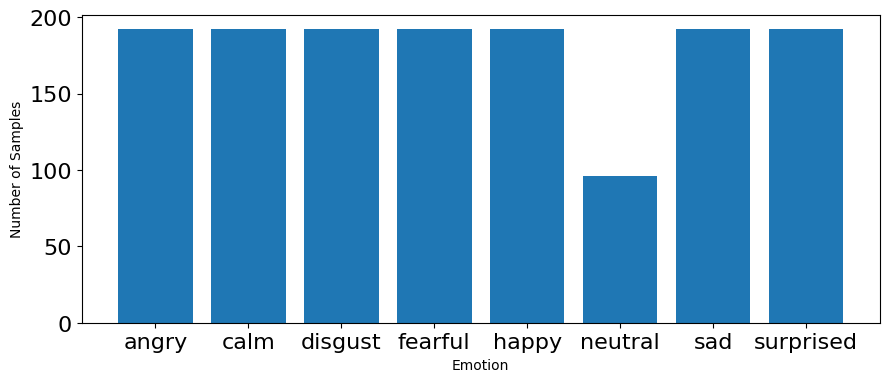

In [11]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(emotions, return_counts=True)
plt.bar(x=range(8), height=count)
plt.xticks(ticks=range(8), labels = [emotion for emotion in emotion_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

**数据检查//Data_Check**

In [13]:
def print_features(df):
    # Check chromagram feature values
    features_df_chromagram = df.iloc[:, :12]  # 前 12 列为色谱图特征
    chroma_min = features_df_chromagram.min().min()
    chroma_max = features_df_chromagram.max().max()
    chroma_mean = features_df_chromagram.stack().mean()
    chroma_stdev = features_df_chromagram.stack().std()
    print(f'12 Chromagram features:       \
    min = {chroma_min:.3f}, \
    max = {chroma_max:.3f}, \
    mean = {chroma_mean:.3f}, \
    deviation = {chroma_stdev:.3f}')

    # Check mel spectrogram feature values
    features_df_melspectrogram = df.iloc[:, 12:140]  # 接下来 128 列为梅尔频谱图特征
    mel_min = features_df_melspectrogram.min().min()
    mel_max = features_df_melspectrogram.max().max()
    mel_mean = features_df_melspectrogram.stack().mean()
    mel_stdev = features_df_melspectrogram.stack().std()
    print(f'\n128 Mel Spectrogram features: \
    min = {mel_min:.3f}, \
    max = {mel_max:.3f}, \
    mean = {mel_mean:.3f}, \
    deviation = {mel_stdev:.3f}')

    # Check MFCC feature values
    features_df_mfcc = df.iloc[:, 140:180]  # 接下来 40 列为 MFCC 特征
    mfcc_min = features_df_mfcc.min().min()
    mfcc_max = features_df_mfcc.max().max()
    mfcc_mean = features_df_mfcc.stack().mean()
    mfcc_stdev = features_df_mfcc.stack().std()
    print(f'\n40 MFCC features:             \
    min = {mfcc_min:.3f},\
    max = {mfcc_max:.3f},\
    mean = {mfcc_mean:.3f},\
    deviation = {mfcc_stdev:.3f}')


print_features(features)


12 Chromagram features:           min = 0.000,     max = 0.874,     mean = 0.664,     deviation = 0.094

128 Mel Spectrogram features:     min = 0.000,     max = 149.208,     mean = 0.187,     deviation = 1.597

40 MFCC features:                 min = -873.242,    max = 115.126,    mean = -14.575,    deviation = 98.327


**标准化_归一化//Standard_Data**

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
features_scaled = features
features_scaled = scaler.fit_transform(features_scaled)

custom_features_scaled = scaler.transform(custom_features)


scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
features_minmax = features
features_minmax = scaler.fit_transform(features_minmax)

custom_features_minmax = scaler.transform(custom_features)


print('\033[1m'+'Standard Scaling:\n'+'\033[0m')
features_scaled_df = pd.DataFrame(features_scaled)
print_features(features_scaled_df)

print('\n\n\033[1m'+'MinMax Scaling:\n'+'\033[0m')
features_minmax_df = pd.DataFrame(features_minmax)
print_features(features_minmax_df)

print('------------------------------------------------')

print('\033[1m'+'Custom_Standard Scaling:\n'+'\033[0m')
custom_features_scaled_df = pd.DataFrame(custom_features_scaled)
print_features(custom_features_scaled_df)

print('\033[1m'+'Custom_MinMax Scaling:\n'+'\033[0m')
custom_features_minmax_df = pd.DataFrame(custom_features_minmax)
print_features(custom_features_minmax_df)




Standard Scaling:

12 Chromagram features:           min = -7.976,     max = 2.365,     mean = 0.000,     deviation = 1.000

128 Mel Spectrogram features:     min = -0.474,     max = 36.543,     mean = -0.000,     deviation = 1.000

40 MFCC features:                 min = -4.306,    max = 6.240,    mean = -0.000,    deviation = 1.000


MinMax Scaling:

12 Chromagram features:           min = 0.000,     max = 1.000,     mean = 0.782,     deviation = 0.110

128 Mel Spectrogram features:     min = 0.000,     max = 1.000,     mean = 0.015,     deviation = 0.061

40 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.404,    deviation = 0.166
------------------------------------------------
Custom_Standard Scaling:

12 Chromagram features:           min = -2.364,     max = 1.102,     mean = -0.025,     deviation = 0.708

128 Mel Spectrogram features:     min = -0.225,     max = 2188.686,     mean = 13.283,     deviation = 103.679

40 MFCC features:                 min = 

**80/20_Training**

In [17]:
from sklearn.model_selection import train_test_split


############# Unscaled test/train set #############
X_train, X_test, y_train, y_test =train_test_split(
    features,
    emotions,
    test_size=0.2,
    random_state=42
)

############ Standard Scaled test/train set ###########
# The labels/classes (y_train, y_test) never change, keep old values
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    features_scaled,
    emotions,
    test_size=0.2,
    random_state=42
)

############# MinMax Scaled test/train set ###############
# The labels/classes (y_train, y_test) never change, keep old values
X_train_minmax, X_test_minmax, _, _ = train_test_split(
    features_scaled,
    emotions,
    test_size=0.2,
    random_state=42
)

**模型对比//Comparing Models**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)

,Classifier,Accuracy Score
0,KNeighborsClassifier,56.94%
4,RandomForestClassifier,54.51%
1,SVC,50.35%
2,SVC RBF kernel,46.18%
3,DecisionTreeClassifier,35.07%
5,AdaBoostClassifier,27.43%
6,GaussianNB,26.74%
7,QuadraticDiscriminantAnalysis,22.22%


**SVC**

In [99]:
from sklearn.svm import SVC

model = SVC(
    C=10,  #higher the value tighter the margin
    gamma='auto',
    kernel='rbf',
    random_state=42
)

model.fit(X_train, y_train)

print(f'SVC Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'SVC Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

# Test the model using custom_features
y_custom_pred = model.predict(custom_features)
custom_accuracy = accuracy_score(custom_emotions, y_custom_pred)
print(f'SVC Model\'s accuracy on custom dataset (original) is {100*custom_accuracy:.2f}%')

# Test the tuned kNN model using standardized custom_features
y_custom_pred_knn_scaled = model.predict(custom_features_scaled)
custom_accuracy_knn_scaled = accuracy_score(custom_emotions, y_custom_pred_knn_scaled)
print(f'SVC Model\'s accuracy on custom dataset (standardized) is {100*custom_accuracy_knn_scaled:.2f}%')

# Test the tuned kNN model using min-max normalized custom_features
y_custom_pred_knn_minmax = model.predict(custom_features_minmax)
custom_accuracy_knn_minmax = accuracy_score(custom_emotions, y_custom_pred_knn_minmax)
print(f'SVC Model\'s accuracy on custom dataset (min-max normalized) is {100*custom_accuracy_knn_minmax:.2f}%')





SVC Model's accuracy on training set is 99.74%
SVC Model's accuracy on test set is 52.78%
SVC Model's accuracy on custom dataset (original) is 12.50%
kNN Model's accuracy on custom dataset (standardized) is 12.50%
kNN Model's accuracy on custom dataset (min-max normalized) is 0.00%


**K_Nearest_Neighbours**

In [92]:
from sklearn.neighbors import KNeighborsClassifier

####### Default kNN  ########
model = KNeighborsClassifier(
)

model.fit(X_train, y_train)

print(f'Default kNN Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default kNN Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')

##### (hastily) tuned kNN ######
model = KNeighborsClassifier(
    n_neighbors = 5,
    weights = 'distance',
    algorithm = 'brute',
    n_jobs=4
)

model.fit(X_train, y_train)

print(f'kNN Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'kNN Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

# Test the tuned kNN model using custom_features
y_custom_pred_knn = model.predict(custom_features)
custom_accuracy_knn = accuracy_score(custom_emotions, y_custom_pred_knn)
print(f'kNN Model\'s accuracy on custom dataset (original) is {100*custom_accuracy_knn:.2f}%')

# Test the tuned kNN model using standardized custom_features
y_custom_pred_knn_scaled = model.predict(custom_features_scaled)
custom_accuracy_knn_scaled = accuracy_score(custom_emotions, y_custom_pred_knn_scaled)
print(f'kNN Model\'s accuracy on custom dataset (standardized) is {100*custom_accuracy_knn_scaled:.2f}%')

# Test the tuned kNN model using min-max normalized custom_features
y_custom_pred_knn_minmax = model.predict(custom_features_minmax)
custom_accuracy_knn_minmax = accuracy_score(custom_emotions, y_custom_pred_knn_minmax)
print(f'kNN Model\'s accuracy on custom dataset (min-max normalized) is {100*custom_accuracy_knn_minmax:.2f}%')





Default kNN Model's accuracy on training set is 66.06%
Default kNN Model's accuracy on test set is 45.14%

kNN Model's accuracy on training set is 99.74%
kNN Model's accuracy on test set is 47.57%
kNN Model's accuracy on custom dataset (original) is 12.50%
kNN Model's accuracy on custom dataset (standardized) is 12.50%
kNN Model's accuracy on custom dataset (min-max normalized) is 12.50%


**Random_Forests**

In [102]:
from sklearn.ensemble import RandomForestClassifier

####### Default Random Forest ########
model = RandomForestClassifier(
    random_state=69
)

model.fit(X_train, y_train)

print(f'Default Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')


########## Tuned Random Forest #######
model = RandomForestClassifier(
    n_estimators = 500,
    criterion ='entropy',
    warm_start = True,
    max_features = 'sqrt',
    oob_score = True, # more on this below
    random_state=42
)

model.fit(X_train, y_train)

print(f'Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

# Test the tuned Random Forest model using custom_features
y_custom_pred_rf = model.predict(custom_features)
custom_accuracy_rf = accuracy_score(custom_emotions, y_custom_pred_rf)
print(f'Random Forest Model\'s accuracy on custom dataset (original) is {100*custom_accuracy_rf:.2f}%')

# Test the tuned Random Forest model using standardized custom_features
y_custom_pred_knn_scaled = model.predict(custom_features_scaled)
custom_accuracy_knn_scaled = accuracy_score(custom_emotions, y_custom_pred_knn_scaled)
print(f'Random Forest Model\'s accuracy on custom dataset (standardized) is {100*custom_accuracy_knn_scaled:.2f}%')

# Test the tuned Random Forest model using min-max normalized custom_features
y_custom_pred_knn_minmax = model.predict(custom_features_minmax)
custom_accuracy_knn_minmax = accuracy_score(custom_emotions, y_custom_pred_knn_minmax)
print(f'Random Forest Model\'s accuracy on custom dataset (min-max normalized) is {100*custom_accuracy_knn_minmax:.2f}%')



Default Random Forest Model's accuracy on training set is 99.74%
Default Random Forest Model's accuracy on test set is 54.86%

Random Forest Model's accuracy on training set is 99.74%
Random Forest Model's accuracy on test set is 56.25%
Random Forest Model's accuracy on custom dataset (original) is 12.50%
Random Forest Model's accuracy on custom dataset (standardized) is 12.50%
Random Forest Model's accuracy on custom dataset (min-max normalized) is 12.50%


**<----------------------------------------------------------------------------------------------------------------------------------------------------------------->**

**SVC//Scaled//Minmax**

In [108]:
from sklearn.svm import SVC

model = SVC(
    C=10,  #higher the value tighter the margin
    gamma='auto',
    kernel='rbf',
    random_state=42
)

model.fit(X_train_scaled, y_train)

print(f'SVC Model\'s accuracy on training set is {100*model.score(X_train_scaled, y_train):.2f}%')
print(f'SVC Model\'s accuracy on test set is {100*model.score(X_test_scaled, y_test):.2f}%')

# Test the model using custom_features
y_custom_pred = model.predict(custom_features)
custom_accuracy = accuracy_score(custom_emotions, y_custom_pred)
print(f'SVC Model\'s accuracy on custom dataset (original) is {100*custom_accuracy:.2f}%')


# Test the model using standardized custom_features
y_custom_pred_scaled = model.predict(custom_features_scaled)
custom_accuracy_scaled = accuracy_score(custom_emotions, y_custom_pred_scaled)
print(f'SVC Model\'s accuracy on custom dataset (standardized) is {100*custom_accuracy_scaled:.2f}%')

print('------------------------------------------------')
model.fit(X_train_minmax, y_train)

print(f'SVC Model\'s accuracy on training set is {100*model.score(X_train_minmax, y_train):.2f}%')
print(f'SVC Model\'s accuracy on test set is {100*model.score(X_test_minmax, y_test):.2f}%')

# Test the model using custom_features
y_custom_pred = model.predict(custom_features)
custom_accuracy = accuracy_score(custom_emotions, y_custom_pred)
print(f'SVC Model\'s accuracy on custom dataset (original) is {100*custom_accuracy:.2f}%')

# Test the model using min-max normalized custom_features
y_custom_pred_minmax = model.predict(custom_features_minmax)
custom_accuracy_minmax = accuracy_score(custom_emotions, y_custom_pred_minmax)
print(f'SVC Model\'s accuracy on custom dataset (min-max normalized) is {100*custom_accuracy_minmax:.2f}%')






SVC Model's accuracy on training set is 88.72%
SVC Model's accuracy on test set is 60.76%
SVC Model's accuracy on custom dataset (original) is 12.50%
SVC Model's accuracy on custom dataset (standardized) is 12.50%
------------------------------------------------
SVC Model's accuracy on training set is 88.72%
SVC Model's accuracy on test set is 60.76%
SVC Model's accuracy on custom dataset (original) is 12.50%
SVC Model's accuracy on custom dataset (min-max normalized) is 12.50%


**KNN//Scaled//Minmax**

In [107]:
from sklearn.neighbors import KNeighborsClassifier

####### Default kNN  ########
model = KNeighborsClassifier(
)

model.fit(X_train, y_train)

print(f'Default kNN Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default kNN Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')

##### (hastily) tuned kNN ######
model = KNeighborsClassifier(
    n_neighbors = 5,
    weights = 'distance',
    algorithm = 'brute',
    n_jobs=4
)

model.fit(X_train_scaled, y_train)

print(f'kNN Model\'s accuracy on training set is {100*model.score(X_train_scaled, y_train):.2f}%')
print(f'kNN Model\'s accuracy on test set is {100*model.score(X_test_scaled, y_test):.2f}%')

# Test the tuned kNN model using custom_features
y_custom_pred_knn = model.predict(custom_features)
custom_accuracy_knn = accuracy_score(custom_emotions, y_custom_pred_knn)
print(f'kNN Model\'s accuracy on custom dataset (original) is {100*custom_accuracy_knn:.2f}%')


# Test the tuned kNN model using standardized custom_features
y_custom_pred_knn_scaled = model.predict(custom_features_scaled)
custom_accuracy_knn_scaled = accuracy_score(custom_emotions, y_custom_pred_knn_scaled)
print(f'kNN Model\'s accuracy on custom dataset (standardized) is {100*custom_accuracy_knn_scaled:.2f}%')

print('------------------------------------------------')
model.fit(X_train_minmax, y_train)

print(f'kNN Model\'s accuracy on training set is {100*model.score(X_train_minmax, y_train):.2f}%')
print(f'kNN Model\'s accuracy on test set is {100*model.score(X_test_minmax, y_test):.2f}%')

# Test the tuned kNN model using custom_features
y_custom_pred_knn = model.predict(custom_features)
custom_accuracy_knn = accuracy_score(custom_emotions, y_custom_pred_knn)
print(f'kNN Model\'s accuracy on custom dataset (original) is {100*custom_accuracy_knn:.2f}%')

# Test the model using min-max normalized custom_features
y_custom_pred_minmax = model.predict(custom_features_minmax)
custom_accuracy_minmax = accuracy_score(custom_emotions, y_custom_pred_minmax)
print(f'kNN Model\'s accuracy on custom dataset (min-max normalized) is {100*custom_accuracy_minmax:.2f}%')





Default kNN Model's accuracy on training set is 66.06%
Default kNN Model's accuracy on test set is 45.14%

kNN Model's accuracy on training set is 99.74%
kNN Model's accuracy on test set is 62.50%
kNN Model's accuracy on custom dataset (original) is 12.50%
kNN Model's accuracy on custom dataset (standardized) is 25.00%
------------------------------------------------
kNN Model's accuracy on training set is 99.74%
kNN Model's accuracy on test set is 62.50%
kNN Model's accuracy on custom dataset (original) is 12.50%
kNN Model's accuracy on custom dataset (min-max normalized) is 12.50%


**Random_Forest//Scaled//Minmax**

In [106]:
from sklearn.ensemble import RandomForestClassifier

####### Default Random Forest ########
model = RandomForestClassifier(
    random_state=69
)

model.fit(X_train, y_train)

print(f'Default Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')


########## Tuned Random Forest #######
model = RandomForestClassifier(
    n_estimators = 500,
    criterion ='entropy',
    warm_start = True,
    max_features = 'sqrt',
    oob_score = True, # more on this below
    random_state=42
)

model.fit(X_train_scaled, y_train)

print(f'Random Forest Model\'s accuracy on training set is {100*model.score(X_train_scaled, y_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test set is {100*model.score(X_test_scaled, y_test):.2f}%')

# Test the tuned Random Forest model using custom_features
y_custom_pred_rf = model.predict(custom_features)
custom_accuracy_rf = accuracy_score(custom_emotions, y_custom_pred_rf)
print(f'Random Forest Model\'s accuracy on custom dataset (original) is {100*custom_accuracy_rf:.2f}%')

# Test the tuned Random Forest model using standardized custom_features
y_custom_pred_knn_scaled = model.predict(custom_features_scaled)
custom_accuracy_knn_scaled = accuracy_score(custom_emotions, y_custom_pred_knn_scaled)
print(f'Random Forest Model\'s accuracy on custom dataset (standardized) is {100*custom_accuracy_knn_scaled:.2f}%')


print('------------------------------------------------')
model.fit(X_train_minmax, y_train)

print(f'Random Forest Model\'s accuracy on training set is {100*model.score(X_train_minmax, y_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test set is {100*model.score(X_test_minmax, y_test):.2f}%')

# Test the tuned Random Forest model using custom_features
y_custom_pred_rf = model.predict(custom_features)
custom_accuracy_rf = accuracy_score(custom_emotions, y_custom_pred_rf)
print(f'Random Forest Model\'s accuracy on custom dataset (original) is {100*custom_accuracy_rf:.2f}%')

# Test the model using min-max normalized custom_features
y_custom_pred_minmax = model.predict(custom_features_minmax)
custom_accuracy_minmax = accuracy_score(custom_emotions, y_custom_pred_minmax)
print(f'Random Forest Model\'s accuracy on custom dataset (min-max normalized) is {100*custom_accuracy_minmax:.2f}%')



Default Random Forest Model's accuracy on training set is 99.74%
Default Random Forest Model's accuracy on test set is 54.86%

Random Forest Model's accuracy on training set is 99.74%
Random Forest Model's accuracy on test set is 55.21%
Random Forest Model's accuracy on custom dataset (original) is 25.00%
Random Forest Model's accuracy on custom dataset (standardized) is 12.50%
------------------------------------------------
Random Forest Model's accuracy on training set is 99.74%
Random Forest Model's accuracy on test set is 55.21%
Random Forest Model's accuracy on custom dataset (original) is 25.00%
Random Forest Model's accuracy on custom dataset (min-max normalized) is 12.50%
